In [55]:
import pandas as pd
import pickle
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['subplot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
trial = pd.read_pickle("./voxc_trial.pkl")
sv_df = pd.read_pickle("../dataset/dataframes/voxc1/sv_voxc_dataframe.pkl")

In [58]:
data_folder = "../dataset/kaldi/voxceleb/feats/data-fbank/xvector_npy/"

In [59]:
sv_df['frames'] = sv_df.feat.apply(lambda x: np.load(data_folder + x).shape[0])

In [60]:
voxc1_meta = pd.read_csv("../dataset/voxceleb1/vox1_meta.csv", delimiter="\t")

In [61]:
# frame_diff = trial.apply(lambda x: sv_df.iloc[x.enrolment_id].frames - sv_df.iloc[x.test_id].frames, axis=1)

# equal_gender = trial.apply(lambda x: voxc1_meta.loc[sv_df.iloc[x.enrolment_id].spk].Gender == 
#             voxc1_meta.loc[sv_df.iloc[x.test_id].spk].Gender, axis=1)

# equal_nation = trial.apply(lambda x: voxc1_meta.loc[neg_trials.iloc[x.enrolment_id].spk].Nationality == 
#             voxc1_meta.loc[neg_trials.iloc[x.test_id].spk].Nationality, axis=1)

## gender dependent trials

trial 중 gender equal case에서 남자가 훨씬 많지만, 여자의 케이스와 통계를 비교하면 거의 비슷하다.

In [68]:
gender_equal_trial = trial[trial.gender_equal]

In [69]:
mens = voxc1_meta[voxc1_meta.Gender == 'm']['VGGFace1 ID'].unique().tolist()

In [70]:
girls = voxc1_meta[voxc1_meta.Gender == 'f']['VGGFace1 ID'].unique().tolist()

In [71]:
m_gender_equal = gender_equal_trial[sv_df.iloc[gender_equal_trial.enrolment_id].spk.isin(mens).values]

## Scores

In [110]:
scores = pickle.load(open("../best_models/voxc12/cosine_scores_approx.pkl", "rb"))

In [111]:
trial['score'] = scores

In [112]:
pos_trials = trial[(trial.label == 1)]
neg_trials = trial[(trial.label == 0)]

### Gender

In [113]:
neg_equal_gender = neg_trials[neg_trials.gender_equal]
neg_diff_gender = neg_trials[~neg_trials.gender_equal]

(0, 1.0)

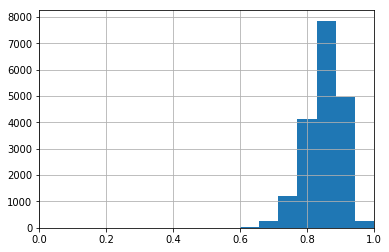

In [114]:
subplot = pos_trials.score.hist()
subplot.set_xlim(0, 1.0)

(0, 1.0)

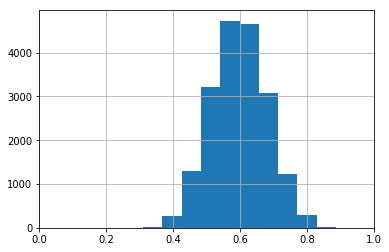

In [115]:
subplot = neg_trials.score.hist()
subplot.set_xlim(0, 1.0)

(0, 1.0)

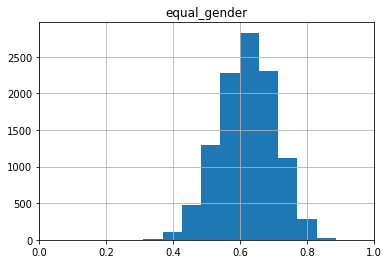

In [116]:
subplot = neg_equal_gender.score.hist()
plt.title("equal_gender")
subplot.set_xlim(0, 1.0)

In [107]:
neg_equal_gender.score.describe()

count    10727.000000
mean         0.619682
std          0.083101
min          0.310341
25%          0.563285
50%          0.622712
75%          0.677226
max          0.885724
Name: score, dtype: float64

(0, 1.0)

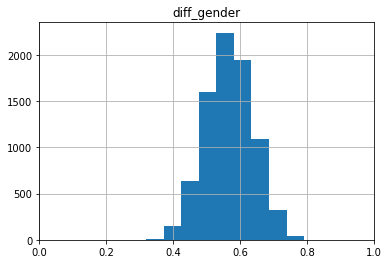

In [108]:
subplot = neg_diff_gender.score.hist()
plt.title("diff_gender")
subplot.set_xlim(0, 1.0)

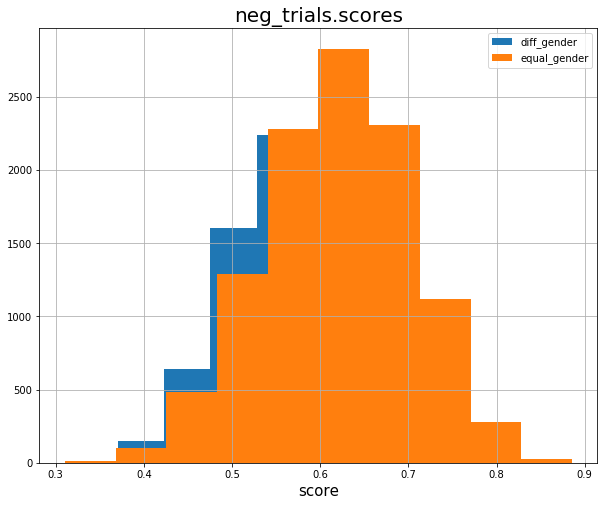

In [109]:
plt.figure(figsize=(10,8))
plt.title("neg_trials.scores", fontsize=20)
plt.xlabel("score", fontsize=15)
subplot1 = neg_diff_gender.score.hist(label='diff_gender')
subplot2 = neg_equal_gender.score.hist(label='equal_gender')
plt.legend()

### gender equality에 따라 eer을 계산해보면?

In [117]:
# Don't know
score_vector = pos_trials.score.tolist() + neg_trials.score.tolist()
label_vector = [1] * len(pos_trials) + [0] * len(neg_trials)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(
        label_vector, score_vector, pos_label=1)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer

0.03971887977851134

In [119]:
# Equal gender
score_vector = pos_trials.score.tolist() + neg_equal_gender.score.tolist()
label_vector = [1] * len(pos_trials) + [0] * len(neg_equal_gender)

from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(
        label_vector, score_vector, pos_label=1)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer

0.0517386035238184

In [121]:
# Diff gender
score_vector = pos_trials.score.tolist() + neg_diff_gender.score.tolist()
label_vector = [1] * len(pos_trials) + [0] * len(neg_diff_gender)

from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(
        label_vector, score_vector, pos_label=1)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer

0.01675977653631285

###  Nationality

In [ ]:
neg_equal_nation = neg_trials[neg_trials.nation_equal]
neg_diff_nation = neg_trials[~neg_trials.nation_equal]

In [ ]:
neg_equal_nation.score.hist()
plt.title("equal_nation")
plt.xlim(0, 1.0)

In [ ]:
neg_equal_nation.score.describe()

In [ ]:
neg_diff_nation.score.hist()
plt.title("diff_nation")
plt.xlim(0, 1.0)

In [ ]:
voxc1_meta[voxc1_meta.Nationality == 'Italy']

In [ ]:
import IPython.display as ipd

In [ ]:
scores